Total spent: $15168.19

Smallest Amt. Spent $3.99
Largest Amt. Spent $709.54
Median Amt. Spent: $35.02
AVerage Amt. Spent: $67.72

Total tax payed: $139.79


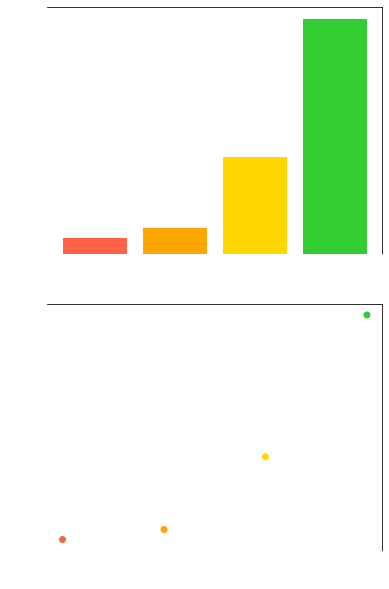

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import csv

file = open('amazon.csv')
orderFile = csv.reader(file)

header = next(orderFile)

order_data = []

for row in orderFile:
    new_row = []
    for i in row:
        if '$' not in i:
            new_row.append(i)
        else:
            new_row.append(i[1:])
    order_data.append(new_row)

# print(order_data)

dataSample = np.array(order_data)

#Find total spent
column_total_cost = np.array(dataSample[:, 8], dtype=float)
total_cost_sum = column_total_cost.sum()
print(f"Total spent: ${total_cost_sum}\n")

#Min and Max spent
column_total_cost_not0 = []
for val in column_total_cost:
    # print(val)
    if val != 0.0:
        column_total_cost_not0.append(val)

column_total_cost_not0 = np.array(column_total_cost_not0)

smallest_amt = column_total_cost_not0.min()
greatest_amt = column_total_cost_not0.max()

median_amt = "{:.2f}".format(np.median(column_total_cost_not0))
average_amt = "{:.2f}".format(np.average(column_total_cost_not0))

print(f"Smallest Amt. Spent ${smallest_amt}")
print(f"Largest Amt. Spent ${greatest_amt}")

print(f"Median Amt. Spent: ${median_amt}")
print(f"AVerage Amt. Spent: ${average_amt}\n")

#Amt. spent on taxes
column_tax_cost = np.array(dataSample[:, 7], dtype=float)
tax_cost_sum = "{:.2f}".format(column_tax_cost.sum())
print(f"Total tax payed: ${tax_cost_sum}")

tax_index = np.where(dataSample[:, 7]!='0.00')
tax_all = dataSample[tax_index]
tax = np.array(tax_all[:, 7:9], dtype=float)

tax_percent = 0
for val in tax:
    if val[0] > 0:
        tax_percent = 100*val[0]/val[1]
    # print(tax_percent)
#% of tax changes per purchase

#Year by Year Visualization
dates_column = dataSample[:, 0]
dates_column_year = []
year_num_orders = {}

for date in dates_column:
    date = date.split("/")
    dates_column_year.append(date[2])

for year in dates_column_year:
    if year not in year_num_orders.keys():
        year_num_orders[year] = 1
    else:
        year_num_orders[year] += 1

years = list(year_num_orders.keys())
count = list(year_num_orders.values())

figure, ax = plt.subplots(2)

figure.set_size_inches(6, 10)

ax[0].bar(years, count, color=['tomato', 'orange', 'gold', 'limegreen'])
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Orders")

ax[1].scatter(years, count, color=['tomato', 'orange', 'gold', 'limegreen'])
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of Orders")

ax[0].spines['bottom'].set_color('white')
ax[0].xaxis.label.set_color('white')
ax[0].tick_params(axis='x', colors='white')
ax[0].spines['left'].set_color('white')
ax[0].yaxis.label.set_color('white')
ax[0].tick_params(axis='y', colors='white')

ax[1].spines['bottom'].set_color('white')
ax[1].xaxis.label.set_color('white')
ax[1].tick_params(axis='x', colors='white')
ax[1].spines['left'].set_color('white')
ax[1].yaxis.label.set_color('white')
ax[1].tick_params(axis='y', colors='white')

plt.show()

file.close()